In [1]:
!pip install ultralytics
! pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.9/932.9 kB 16.5 MB/s eta 0:00:00a 0:00:01


In [2]:
import yaml

def create_yaml(train, val,test,nc ,names, filename='dataset.yaml'):
  """
  Creates a YAML file for YOLOv11 model training.

  Args:
    train_dir: Path to the training directory.
    val_dir: Path to the validation directory.
    nc: Number of classes.
    names: List of class names.
    filename: Name of the output YAML file.
  """

  data = {
      'train': train, 
      'val': val,
      'test': test,
      'nc' : nc, # số lượng nhãn
      'names': names # tên nhãn
  }

  with open(filename, 'w') as f:
    yaml.dump(data, f, indent=2)

# Example usage with changeable directories
train = '/kaggle/input/mydatsnesww/guns-knives-yolo/train'
val= '/kaggle/input/mydatsnesww/guns-knives-yolo/valid'
test = '/kaggle/input/mydatsnesww/guns-knives-yolo/test'
nc = 2 
names = ["Knife", "Gun"]

create_yaml(train, val, test ,nc,  names)

In [3]:
with open('/kaggle/working/dataset.yaml','r') as f:
    print(f.read())

names:
- Knife
- Gun
nc: 2
test: /kaggle/input/mydatsnesww/guns-knives-yolo/test
train: /kaggle/input/mydatsnesww/guns-knives-yolo/train
val: /kaggle/input/mydatsnesww/guns-knives-yolo/valid



In [4]:
from ultralytics import YOLO
model = YOLO('yolo11x.pt')
model.train(data="//kaggle/working/dataset.yaml", epochs=70,imgsz=640 ,batch=14,optimizer='SGD') # Stochastic Gradient Descent Đây là một phiên bản của thuật toán Gradient Descent, nhưng thay vì sử dụng toàn bộ tập dữ liệu để cập nhật trọng số, nó chỉ sử dụng một mẫu hoặc một batch nhỏ để cập nhật.


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 109M/109M [00:00<00:00, 259MB/s] 


Ultralytics 8.3.88 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=//kaggle/working/dataset.yaml, epochs=70, time=None, patience=100, batch=14, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.1MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/mydatsnesww/guns-knives-yolo/train/labels... 5058 images, 20 backgrounds, 147 corrupt: 100%|██████████| 5058/5058 [00:12<00:00, 401.84it/s]

train: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/train/images/Automatic Rifle_26.jpeg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
train: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/train/images/Automatic Rifle_44.jpeg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
train: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/train/images/Grenade Launcher_46.jpeg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
train: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/train/images/SMG_21.jpeg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
train: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/train/images/SMG_34.jpeg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
tra

train: WARNING ⚠️ Cache directory /kaggle/input/mydatsnesww/guns-knives-yolo/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 5910. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/mydatsnesww/guns-knives-yolo/valid/labels... 1196 images, 7 backgrounds, 38 corrupt: 100%|██████████| 1196/1196 [00:02<00:00, 443.52it/s]

val: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/valid/images/Grenade Launcher_47.jpeg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/valid/images/SMG_53.jpeg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/valid/images/SMG_86.jpeg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/valid/images/Sniper_11.jpeg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/valid/images/Sniper_12.jpeg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /kaggle/input/m

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.000546875), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      13.7G      1.096      1.768      1.475         26        640: 100%|██████████| 351/351 [06:33<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:36<00:00,  1.14it/s]

                   all       1158       1374      0.749      0.684      0.759      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      14.2G      1.148      1.437      1.481         28        640: 100%|██████████| 351/351 [06:35<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.646      0.586      0.626      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      13.6G      1.336      1.733      1.627         30        640: 100%|██████████| 351/351 [06:33<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.17it/s]

                   all       1158       1374      0.434      0.326      0.303      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      13.7G      1.452      1.937      1.729         24        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.397      0.445      0.407      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      13.6G      1.411        1.9      1.697         44        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.557      0.437      0.477      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      13.6G      1.335      1.774      1.636         24        640: 100%|██████████| 351/351 [06:33<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.627      0.484      0.528      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      13.5G      1.313      1.731      1.621         29        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.657      0.486      0.563      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      13.5G      1.266      1.632      1.582         32        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.766      0.546      0.644      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      13.7G      1.236      1.574       1.56         38        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.714      0.561      0.647      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      13.6G      1.205      1.502      1.525         22        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.17it/s]

                   all       1158       1374       0.74      0.631      0.717      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      13.5G      1.192      1.478      1.523         25        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.757      0.592      0.686      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      13.6G       1.15      1.414      1.495         36        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.737      0.628      0.719      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      13.4G      1.136      1.375      1.479         24        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374       0.78      0.655      0.753      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      13.6G      1.128      1.341      1.473         33        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.786      0.562      0.682      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      13.5G      1.111      1.271      1.449         29        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.827       0.66      0.763       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      13.6G      1.095      1.262      1.442         22        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.825      0.691        0.8      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      13.6G      1.092      1.236      1.439         23        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.807      0.692      0.784      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      13.4G      1.081      1.212      1.425         27        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.814      0.697      0.802      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      13.6G      1.069      1.205      1.425         23        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.807      0.715      0.808      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      13.5G      1.054       1.17      1.415         20        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.852      0.727      0.825      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      13.5G       1.05      1.142      1.403         37        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.844      0.728      0.824        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      13.5G       1.02       1.12      1.391         28        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.843      0.725       0.84      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      13.4G      1.018      1.107      1.382         42        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.828      0.754      0.845       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      13.6G      1.015      1.109      1.373         19        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.846      0.752      0.846      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      13.5G     0.9899      1.061      1.369         38        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.863      0.765      0.859      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      13.6G     0.9909      1.054      1.358         23        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374       0.84      0.772      0.855       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      13.5G     0.9859      1.008      1.353         21        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374       0.86      0.764      0.862      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      13.5G     0.9802      1.022      1.352         32        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.856      0.767      0.862      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      13.6G     0.9703      1.014      1.337         30        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.861      0.783      0.872      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      13.6G     0.9645     0.9936      1.333         43        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.866      0.783      0.879       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      13.6G     0.9518     0.9702      1.324         25        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.846      0.811      0.882      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      13.6G     0.9369     0.9384       1.31         29        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374       0.86      0.791      0.879      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      13.4G     0.9352     0.9438      1.302         41        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.912      0.787      0.892      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      13.6G     0.9257     0.9138        1.3         22        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374       0.88       0.79      0.893      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      13.6G     0.9218     0.9069      1.303         24        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.887      0.778      0.879      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      13.6G     0.9219     0.8914      1.301         24        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374       0.88      0.805      0.889      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      13.5G     0.9094     0.8722      1.284         31        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.873      0.811      0.892      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      13.4G     0.9057     0.8689      1.291         25        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.882      0.801      0.894      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      13.6G     0.8932     0.8552       1.28         22        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.894      0.805      0.901      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      13.6G     0.8802     0.8385      1.268         22        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.891      0.812      0.899       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      13.5G     0.8816     0.8225      1.261         25        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.884      0.809      0.901      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      13.5G      0.872      0.822      1.265         24        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.899      0.822      0.907      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      13.5G     0.8665     0.7983       1.26         25        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.897      0.829      0.908      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      13.7G     0.8616      0.786      1.258         29        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.20it/s]

                   all       1158       1374       0.88       0.83      0.912      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      13.6G     0.8425       0.77      1.245         29        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.894      0.821      0.904      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      13.5G     0.8462     0.7692      1.238         21        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.918       0.82      0.908      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      13.6G      0.832     0.7579      1.233         34        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.883      0.838      0.909      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      13.4G     0.8275     0.7423      1.227         27        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.877      0.843      0.906      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      13.6G     0.8217     0.7243      1.228         28        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.876      0.863      0.917      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      13.5G     0.8179     0.7171      1.225         20        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.912       0.84      0.914      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      13.6G     0.8203     0.7282      1.219         26        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.917      0.841      0.921      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      13.5G     0.8008     0.6903      1.209         27        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.916      0.839       0.92      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      13.4G        0.8     0.7016      1.213         31        640: 100%|██████████| 351/351 [06:31<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.902      0.855      0.922      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      13.6G     0.7933     0.6868        1.2         32        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.905      0.852      0.927      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      13.6G     0.7915     0.6716        1.2         35        640: 100%|██████████| 351/351 [06:33<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.897       0.85      0.917      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      13.5G     0.7679     0.6498       1.19         26        640: 100%|██████████| 351/351 [06:33<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.925      0.859      0.925      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      13.5G     0.7643      0.644      1.185         24        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.913      0.844      0.918      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      13.4G      0.761      0.641      1.181         38        640: 100%|██████████| 351/351 [06:33<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374       0.92      0.851       0.92      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      13.7G     0.7616     0.6296      1.175         30        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.926      0.853      0.922      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      13.6G     0.7514     0.6188      1.172         27        640: 100%|██████████| 351/351 [06:33<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.921      0.852      0.927      0.732


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      13.5G     0.6513     0.4287      1.112         12        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.933       0.84       0.92       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      13.6G     0.6384     0.4099      1.099         12        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.911      0.859      0.923       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      13.4G     0.6307     0.4003      1.095         12        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.923       0.85      0.925      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      13.7G     0.6163     0.3802      1.089         14        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.913      0.873      0.927      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      13.5G     0.6068     0.3705      1.082         13        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.931      0.859      0.928      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      13.6G     0.5944     0.3609      1.077         14        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.919      0.863      0.929      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      13.5G     0.5917     0.3504      1.073         12        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.925      0.855      0.929      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      13.4G      0.582     0.3461      1.065         10        640: 100%|██████████| 351/351 [06:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374       0.92      0.862      0.929      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      13.7G     0.5756     0.3397      1.058         13        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.19it/s]

                   all       1158       1374      0.931      0.858      0.927      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      13.6G     0.5703     0.3397      1.052         11        640: 100%|██████████| 351/351 [06:32<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.18it/s]

                   all       1158       1374      0.924      0.868      0.928      0.737



70 epochs completed in 8.352 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 114.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.88 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 190 layers, 56,829,334 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:35<00:00,  1.17it/s]


                   all       1158       1374      0.919      0.863      0.929      0.741
                 Knife        656        766      0.919      0.877      0.931      0.705
                   Gun        498        608      0.918      0.849      0.928      0.776


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 27.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7de01d6c3130>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [7]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

In [8]:
metrics = model.val(data="/kaggle/working/dataset.yaml", imgsz=640)

Ultralytics 8.3.88 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 190 layers, 56,829,334 parameters, 0 gradients, 194.4 GFLOPs


val: Scanning /kaggle/input/mydatsnesww/guns-knives-yolo/valid/labels... 1196 images, 7 backgrounds, 38 corrupt: 100%|██████████| 1196/1196 [00:02<00:00, 410.52it/s]

val: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/valid/images/Grenade Launcher_47.jpeg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/valid/images/SMG_53.jpeg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/valid/images/SMG_86.jpeg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/valid/images/Sniper_11.jpeg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /kaggle/input/mydatsnesww/guns-knives-yolo/valid/images/Sniper_12.jpeg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /kaggle/input/m


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:24<00:00,  1.16s/it]


                   all       1158       1374      0.919      0.862       0.93       0.74
                 Knife        656        766      0.919      0.875      0.932      0.705
                   Gun        498        608       0.92      0.848      0.929      0.776


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.3ms preprocess, 69.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val


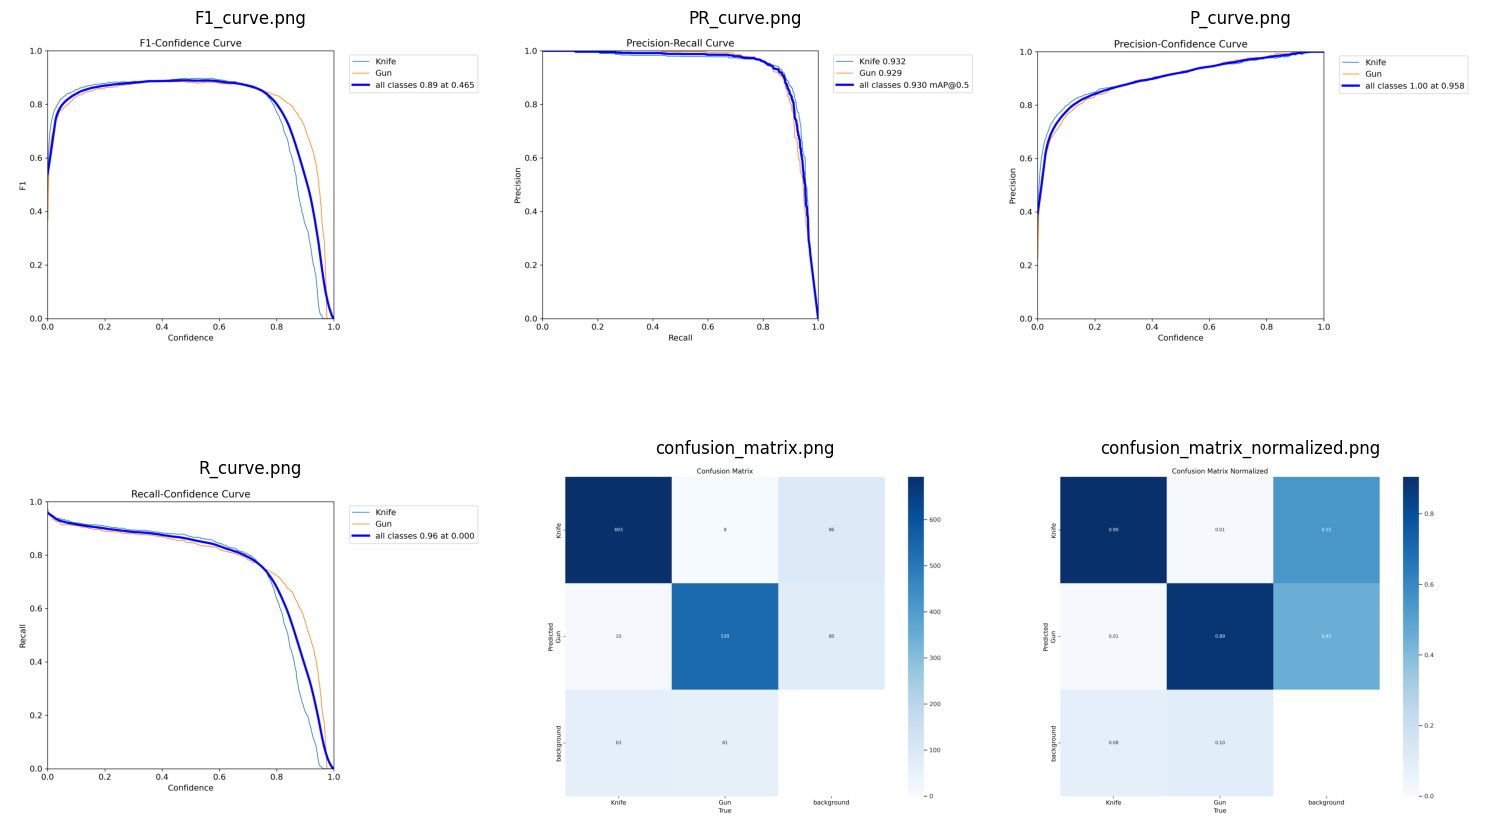

In [14]:
import cv2
import matplotlib.pyplot as plt

# Danh sách ảnh cần hiển thị
image_files = [
    "F1_curve.png", "PR_curve.png", "P_curve.png",
    "R_curve.png", "confusion_matrix.png","confusion_matrix_normalized.png"
]

# Định dạng đường dẫn
image_paths = [f"/kaggle/working/runs/detect/val/{img}" for img in image_files]

# Hiển thị ảnh
plt.figure(figsize=(15, 10))

for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(2, 3, i + 1)  # Tạo lưới 2x3 để hiển thị ảnh
    plt.imshow(img)
    plt.title(image_files[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
